# HOUSE PRICE PREDICTION

**PROJECT OVERVIEW**

This data is drawn from a kaggle competition. It shows the variables that influence the selling price of a house. If you ask a home buyer to describe their dream house, they probably won't begin with the height of the basement ceiling or the type of fence surrounding the house.

This dataset provides us with 79 explanatory variables decribing almost every aspect of residential homes. Some of the explanatory variables are size of the Garage, Type of fence surrounding the house.


**PROBLEM STATEMENT**

This competition challenges you to predict the final price of each house.

**PLAN**

1. load the dataset and summarise it.

2. Clean variables.

3. Explanatory data analysis.

4. Feature engineering.

5. Build prediction  models namely : Lasso regression and random forest, xgboost and decisoin trees


**OUTCOME**

I built four different models (lasso regression, random forest, xgboost and decision trees) and the best perfomance was achieved by lasso regression.

The lasso regression metrics were:

1. **Mean Absolute Error(MAE) - 23704.**

2. **Root Mean Squared Error(RMSE) - 33874.**

3. **R-squared - 0.804.**

4. **R-squared trad - 0.798.**

In [1]:
#Libraries used
library(plyr)
library(tidyverse)
library(scales)
library(corrplot)
library(tidymodels)
library(vip)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


corrplot 0.84 loaded

── Attaching packages ───────────

**Loading in the dataset**

In [2]:
train <- read.csv("../input/hprice/train.csv",stringsAsFactors = FALSE)
test <- read.csv("../input/hprice/test.csv",stringsAsFactors = FALSE)

Train has 81 columns while test has 80 column .

Test dataset is missing the Sale Price column which we are predicting.

Lets add a SalePrice column to test then fill it with NA values in order to row bind them.

In [3]:
test$SalePrice<-NA
all<-rbind(train,test)

#Summary of the binded dataset
str(all)

'data.frame':	2919 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


# DATA CLEANING

Checking for missing variables.

In [4]:
Missing_Indices<-sapply(all, function(x)sum(is.na(x)))
Missing_Summary<-data.frame(Index=names(all), Missing_Values=Missing_Indices , class=class(names(all)))
Missing_Summary %>% 
  mutate(pct = Missing_Values/sum(Missing_Values)*100) %>% 
  filter(pct>0)

Index,Missing_Values,class,pct
<fct>,<int>,<fct>,<dbl>
MSZoning,4,character,0.025933610
LotFrontage,486,character,3.150933610
Alley,2721,character,17.641338174
Utilities,2,character,0.012966805
Exterior1st,1,character,0.006483402
Exterior2nd,1,character,0.006483402
MasVnrType,24,character,0.155601660
MasVnrArea,23,character,0.149118257
BsmtQual,81,character,0.525155602


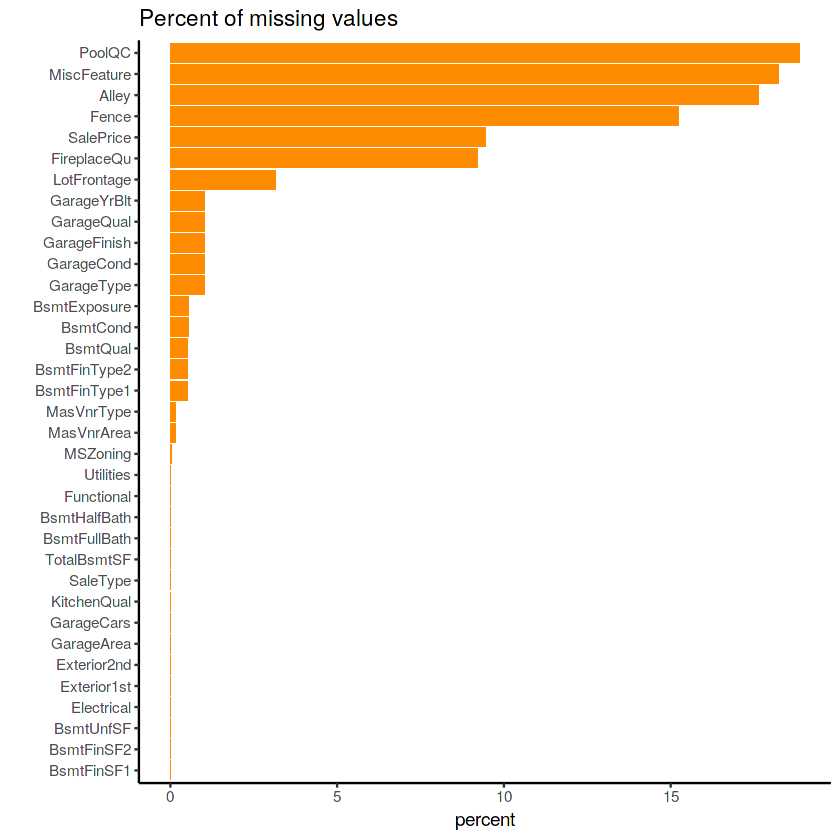

In [5]:
Missing_Summary %>% 
  mutate(pct = Missing_Values/sum(Missing_Values)*100) %>% 
  filter(pct>0) %>% 
  mutate(Index = fct_reorder(Index, pct)) %>% 
  ggplot(aes(pct,Index)) + 
  geom_col(fill = "darkorange") +
  theme_classic() +
  labs(x="percent",
       y= "",
       title = "Percent of missing values")

None of the missing values are greater than 20% which is good .So we will inpute all of them.

In some columns like PoolQc,GarageCond,Utilities and othrs, NA values stand for no pool available so i'll replace all missing values with none.

In [6]:
all[is.na(all$PoolQC),"PoolQC"]<-"None"
all[is.na(all$GarageCond),"GarageCond"]<-"None"
all[is.na(all$GarageQual),"GarageQual"]<-"None"
all[is.na(all$FireplaceQu),"FireplaceQu"]<-"None"
all[is.na(all$KitchenQual),"KitchenQual"]<-"None"
all[is.na(all$HeatingQC),"HeatingQC"]<-"None"
all[is.na(all$BsmtQual),"BsmtQual"]<-"None"
all[is.na(all$BsmtCond),"BsmtCond"]<-"None"
all[is.na(all$ExterCond),"ExterCond"]<-"None"
all[is.na(all$ExterQual),"ExterQual"]<-"None"
all[is.na(all$Alley),"Alley"]<-"None"
all[is.na(all$Utilities),"Utilities"]<-"None"
all[is.na(all$Exterior1st),"Exterior1st"]<-"None"
all[is.na(all$Exterior2nd),"Exterior2nd"]<-"None"
all[is.na(all$MasVnrType),"MasVnrType"]<-"None"
all[is.na(all$BsmtExposure),"BsmtExposure"]<-"None"
all[is.na(all$BsmtFinType1),"BsmtFinType1"]<-"None"
all[is.na(all$BsmtFinType2),"BsmtFinType2"]<-"None"
all[is.na(all$Electrical),"Electrical"]<-"None"
all[is.na(all$Functional),"Functional"]<-"None"
all[is.na(all$GarageType),"GarageType"]<-"None"
all[is.na(all$GarageFinish),"GarageFinish"]<-"None"
all[is.na(all$MiscFeature),"MiscFeature"]<-"None"
all[is.na(all$SaleType),"SaleType"]<-"WD"
all[is.na(all$Fence),"Fence"]<-"None"

#Here NA i'll replace with zeros.
all[is.na(all$GarageCars),"GarageCars"]<-0
all[is.na(all$GarageArea),"GarageArea"]<-0
all[is.na(all$GarageYrBlt),"GarageYrBlt"]<-0

We will replace the rest of the missing values with their mode and mean.

In [7]:
#We will create a mode function
Mode = function(x){
  ta=table(x)
  tam=max(ta)
  if(all(ta==tam))
    mod=NA
  else
    if(is.numeric(x))
      mod = as.numeric(names(ta)[ta==tam])
  else
    mod=names(ta)[ta==tam]
  return(mod)
 
}
mode.MSZoning<-Mode(all$MSZoning)
all[is.na(all$MSZoning),"MSZoning"]<-"mode.MSZoning"



median(all$MasVnrArea, na.rm = T)
all[is.na(all$MasVnrArea),"MasVnrArea"]<-0


median(all$BsmtFinSF2, na.rm = T)
all[is.na(all$BsmtFinSF2),"BsmtFinSF2"]<-0


median(all$BsmtFinSF1,na.rm = T)
all[is.na(all$BsmtFinSF1),"BsmtFinSF1"]<-369


median(all$BsmtUnfSF,na.rm =T) 
all[is.na(all$BsmtUnfSF),"BsmtUnfSF"]<-467


median(all$TotalBsmtSF, na.rm = T)
all[is.na(all$TotalBsmtSF),"TotalBsmtSF"]<-990


Mode(all$BsmtFullBath)
all[is.na(all$BsmtFullBath),"BsmtFullBath"]<-0


Mode(all$BsmtHalfBath)
all[is.na(all$BsmtHalfBath),"BsmtHalfBath"]<-0

#We will replace with mean
mean(all$LotFrontage, na.rm = T)
all[is.na(all$LotFrontage),"LotFrontage"]<-69


[1] 0

[1] 0

[1] 368.5

[1] 467

[1] 989.5

[1] 0

[1] 0

[1] 69.3058

Let us now seperate  the data back into train and test.

In [8]:
train<-all[c(1:1460),]
test<-all[c(1461:nrow(all)),]

# EDA

## The response variable, SalePrice

Let us plot a graph of the SalePrice.

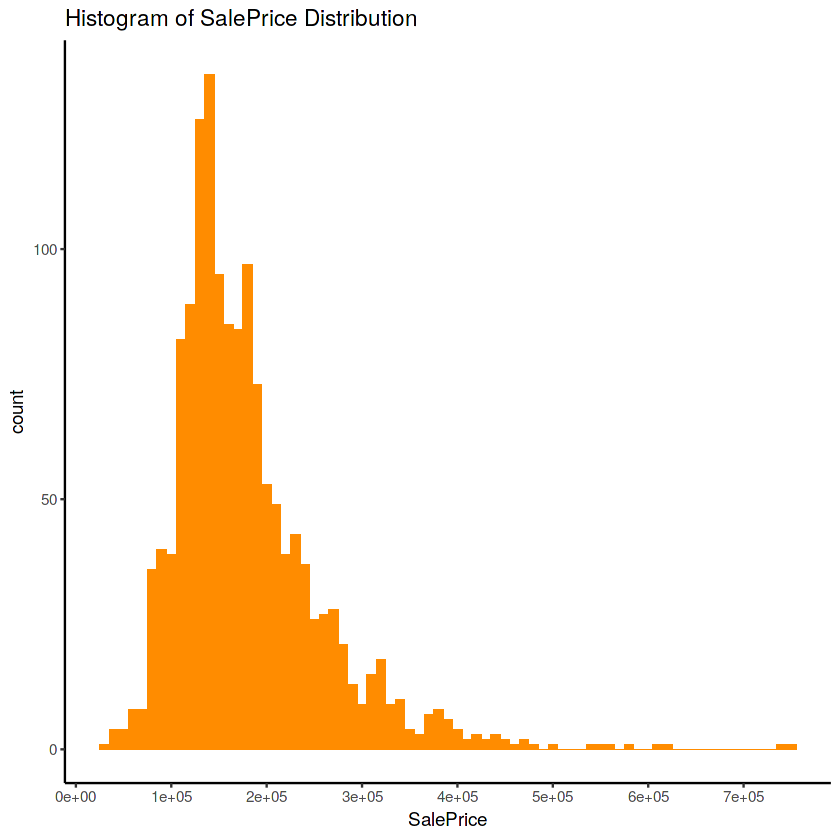

In [9]:
train %>% 
  ggplot(aes(x=SalePrice)) +
  geom_histogram(binwidth=10000, fill="darkorange") +
  scale_x_continuous(breaks=seq(0, 800000, by=100000)) +
  theme_classic() +
  labs(title="Histogram of SalePrice Distribution")

The histogram is rightly skewed since most people cannot afford the really expensive houses.So let us use the log function to make it normally distributed in order to perform regression on it.

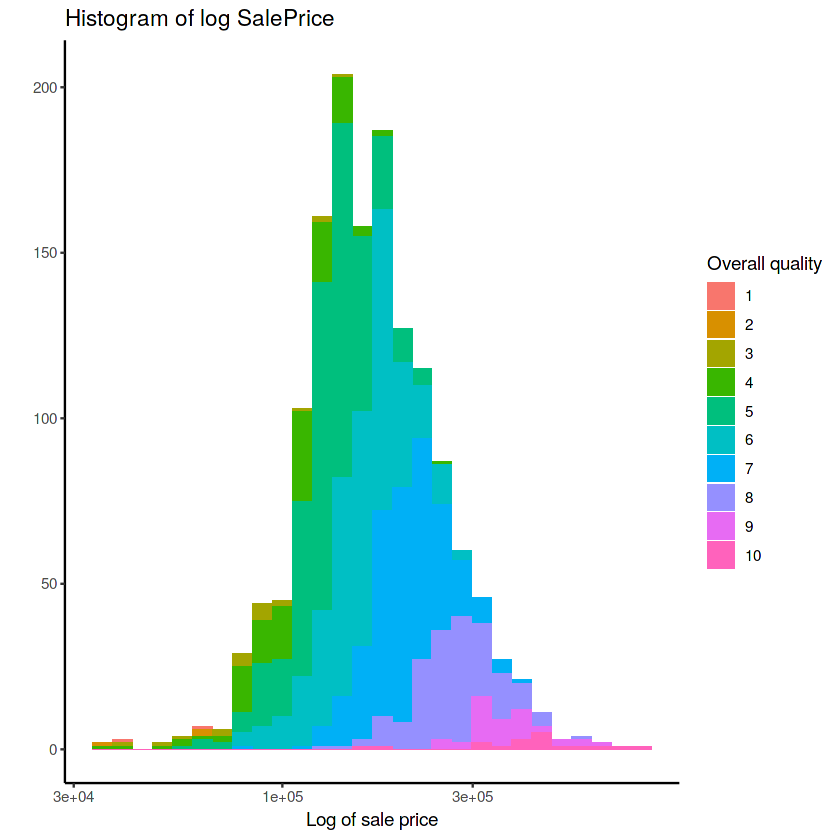

In [10]:
train %>% 
  ggplot(aes(x=SalePrice ,fill=factor(OverallQual))) +
  geom_histogram(binwidth=0.05) +
  scale_x_log10() +
  theme_classic() +
  labs(title="Histogram of log SalePrice",
       fill = "Overall quality",
       x = "Log of sale price",
       y = "")

In the graph:

1.Most houses are with overall quality 4(Below Average), 5(Average), 6(Above Average) and 7(Good)

2.For each rate of level the distribution is almost symetric.

3.Higher quality houses are on the expensive side.

## Correlations with SalePrice.

We are looking for which numeric variables have a correlation of 0.5 and above with the Sale Price.

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,X1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.0000000,0.7909816,0.7086245,0.6404092,0.6234314,0.6135806,0.6058522,0.5606638,0.5337232,0.5228973,0.5071010
OverallQual,0.7909816,1.0000000,0.5751261,0.6007428,0.5651792,0.5491563,0.4791519,0.5284826,0.3897614,0.5975541,0.5715323
GrLivArea,0.7086245,0.5751261,1.0000000,0.4889332,0.4845473,0.4452229,0.5625383,0.6302857,0.8083544,0.2426659,0.3169720
GarageCars,0.6404092,0.6007428,0.4889332,1.0000000,0.8898902,0.4378973,0.4405518,0.4788756,0.3579471,0.5386107,0.4250330
GarageArea,0.6234314,0.5651792,0.4845473,0.8898902,1.0000000,0.4859533,0.4919964,0.4075199,0.3286276,0.4813281,0.3758923
TotalBsmtSF,0.6135806,0.5491563,0.4452229,0.4378973,0.4859533,1.0000000,0.8016375,0.3277509,0.2820818,0.4085044,0.2980470
X1stFlrSF,0.6058522,0.4791519,0.5625383,0.4405518,0.4919964,0.8016375,1.0000000,0.3730769,0.3917824,0.3108136,0.2422452
FullBath,0.5606638,0.5284826,0.6302857,0.4788756,0.4075199,0.3277509,0.3730769,1.0000000,0.5273370,0.4711689,0.4579799
TotRmsAbvGrd,0.5337232,0.3897614,0.8083544,0.3579471,0.3286276,0.2820818,0.3917824,0.5273370,1.0000000,0.1142804,0.1982496
YearBuilt,0.5228973,0.5975541,0.2426659,0.5386107,0.4813281,0.4085044,0.3108136,0.4711689,0.1142804,1.0000000,0.6122346


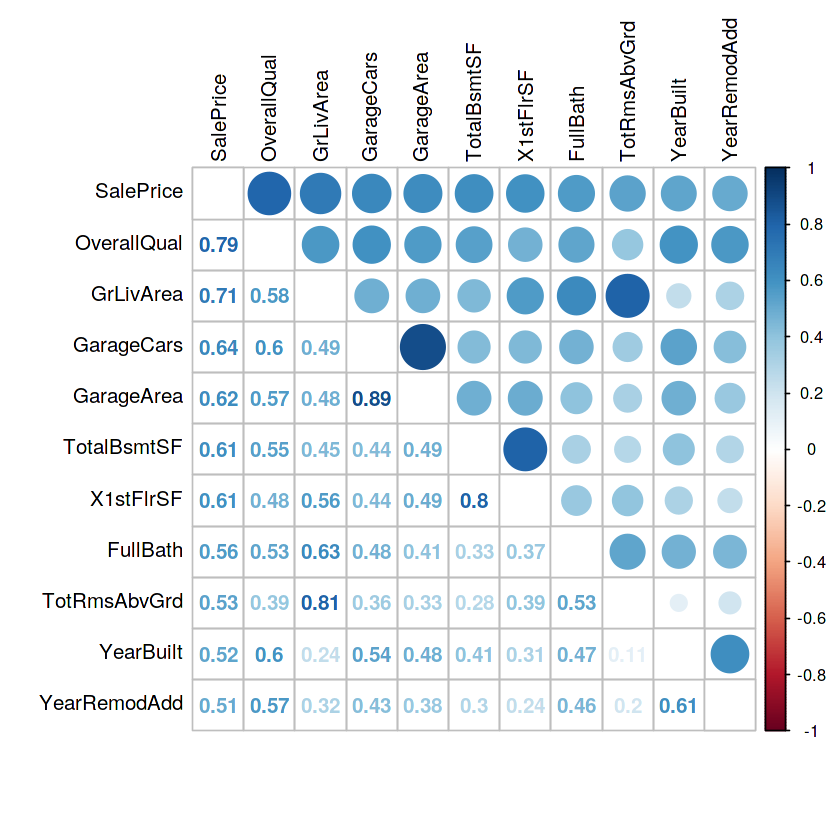

In [11]:
NumVars<-which(sapply(all, is.numeric)) #numeric variables
NamesNumVars<-names(NumVars) #names numeric variables


all_NumVars<-all[,NumVars]
cor_NumVars<-cor(all_NumVars, use="pairwise.complete.obs") #correlation

#sort the correlations in decreasing order
cor_sorted<-as.matrix(sort(cor_NumVars[,"SalePrice"],decreasing=TRUE))

#selecting correlations of=>0.5
cor_High<-names(which(apply(cor_sorted, 1, function(x)abs(x)>0.5)))
cor_NumVars<-cor_NumVars[cor_High,cor_High]
cor_NumVars

corrplot.mixed(cor_NumVars, tl.col="black", tl.pos = "lt")

The variables with a correlation of  greater than 0.5 with the Sale Price are:

1. OverallQual - Overall material and finish of the house.

2. GrLivArea - Propotion of house that is not in the basement.

3. GarageCars - Size of garage in car capacity.

4. TotalBsmtSF - Total square feet of basement area.

5. X1stFlrSF - First floor square feet.

6. FullBath - Full bathrooms above grade.

7. TotRmsAbvGrd - Total rooms above grade.

8. YearBuilt - Original construction date.

9. YearRemodAdd - Remodel date.


**OverallQual**

This is the variable with the highest correlation with Sale Price. Let us visualize it.Rates the Quality of the houses on a scale of 1-10.

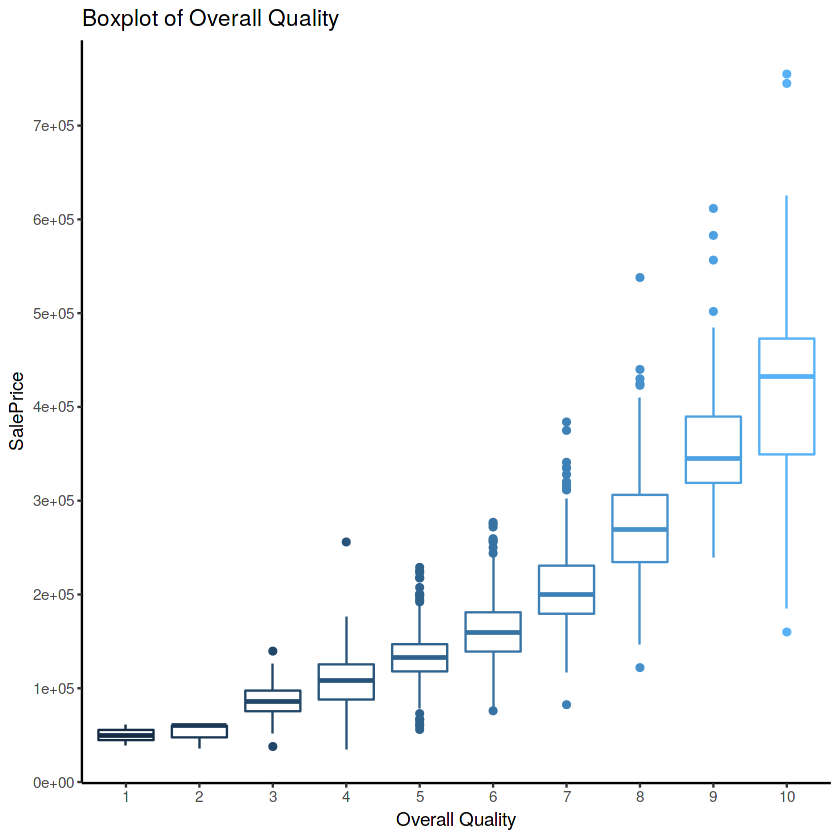

In [12]:
train %>% 
  ggplot(aes(x=factor(OverallQual), y=SalePrice, color=OverallQual)) +
  geom_boxplot(show.legend = FALSE) +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  theme_classic() +
  labs(x="Overall Quality",
       title="Boxplot of Overall Quality")

There is a positive correlation indeed.The are no extreme values regarding outliers.
There is one extreme value . It is very expensive and only grade 4. It is house number **458** as shown below.

In [13]:
Outlier1<-all %>% 
  select(Id, SalePrice, OverallQual) %>% 
  filter(OverallQual==4) %>% 
  arrange(desc(SalePrice)) 
  head(Outlier1,1)

,Id,SalePrice,OverallQual
,<int>,<int>,<int>
1,458,256000,4


**General living Area**

`geom_smooth()` using formula 'y ~ x'



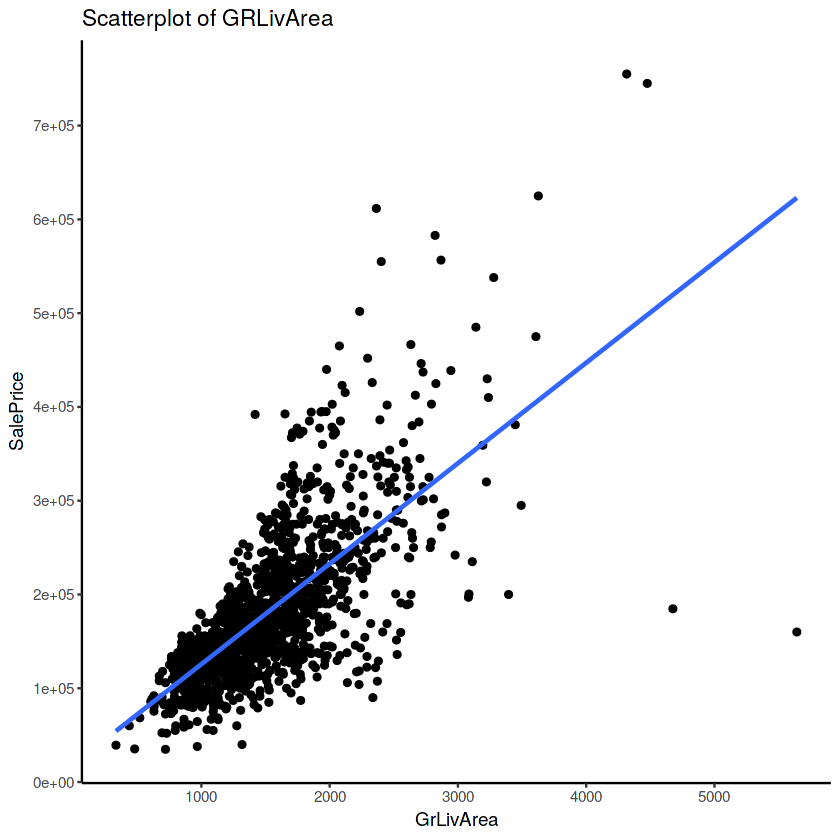

In [14]:
train %>% 
  ggplot(aes(x=GrLivArea, y=SalePrice)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  theme_classic() +
  labs(title="Scatterplot of GRLivArea") 

There are two extreme values (the ones with GrLivARea>4500) .They have a high GrLivArea score but a low Sale Price.

In [15]:
Outlier2<-all %>% 
  select(Id, SalePrice, GrLivArea) %>% 
  filter(GrLivArea>4500)
head(Outlier2, 2)

,Id,SalePrice,GrLivArea
,<int>,<int>,<int>
1,524,184750,4676
2,1299,160000,5642


The houses are Id number **524** and **1299**. We will keep them in mind.
ify

**GarageCars**
This is the size of the garage in terms of capacity of cars.

Warning message:
“`show.legend` must be a logical vector.”


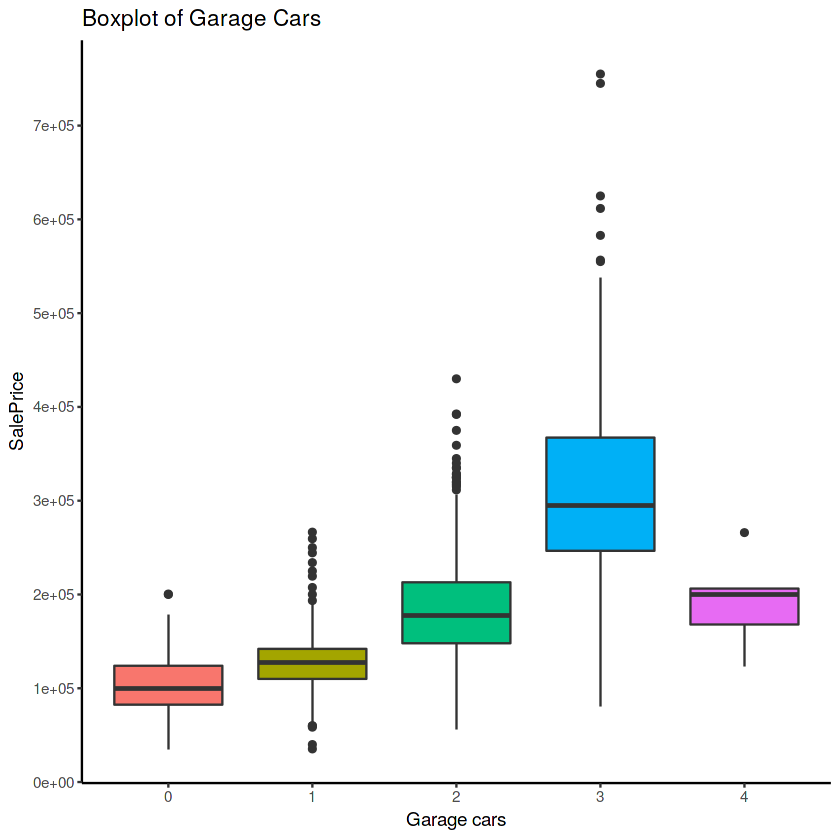

In [16]:
train %>% 
  ggplot(aes(x=factor(GarageCars), y=SalePrice, fill=factor(GarageCars))) +
  geom_boxplot(show.legend = "FALSE") +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  theme_classic() +
  labs(x="Garage cars",
       title="Boxplot of Garage Cars")

It seems that the most expensive houses are the ones with a 3-capacitor garage. There are no extreme values in terms of outliers except the two really expensive houses on 3-capacitor garage.

In [17]:
Outlier3<-all %>% 
  select(Id, GarageCars, SalePrice) %>% 
  filter(GarageCars==3) %>% 
  arrange(desc(SalePrice)) 
  head(Outlier3,2)

,Id,GarageCars,SalePrice
,<int>,<dbl>,<int>
1,692,3,755000
2,1183,3,745000


Houses **692** and **1183**


**TotalBsmtSF**
Total square feet of basement area.

`geom_smooth()` using formula 'y ~ x'



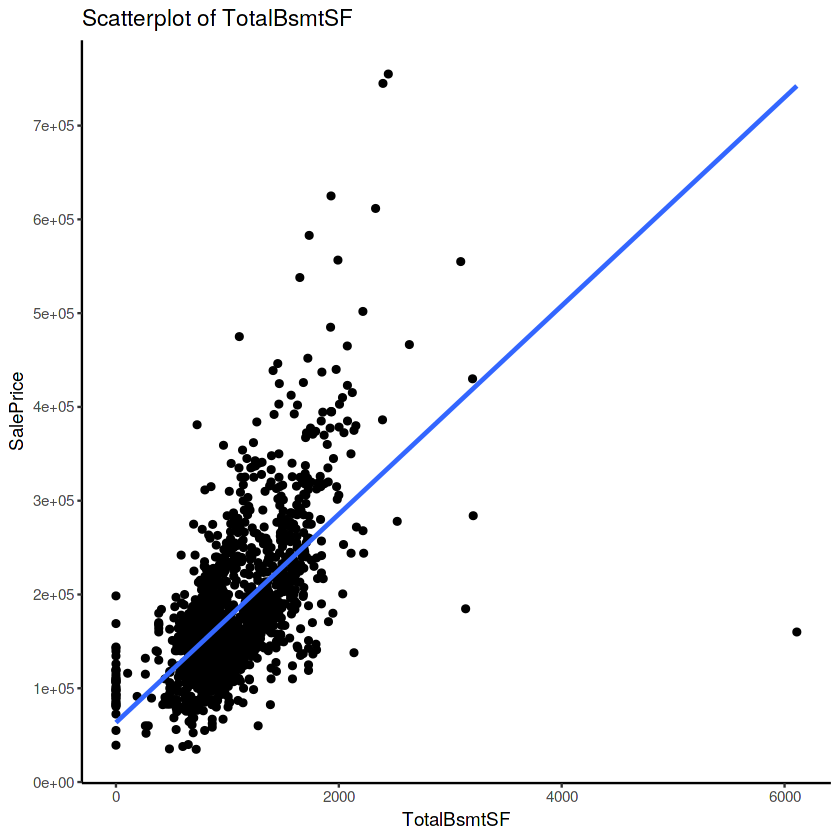

In [18]:
train %>% 
  ggplot(aes(x=TotalBsmtSF, y=SalePrice)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  theme(axis.text.x = element_blank()) +
  theme_classic() +
  labs(title="Scatterplot of TotalBsmtSF")

There is a positive  correlation. There is only one extreme variable. The house with most number of basements with a low price. Let us look at it. It is house number **1299**

In [19]:
Outlier4<-train %>% 
  select(Id, TotalBsmtSF, SalePrice) %>% 
  arrange(desc(TotalBsmtSF)) 
  head(Outlier4, 1)

,Id,TotalBsmtSF,SalePrice
,<int>,<dbl>,<int>
1,1299,6110,160000


**X1stFlrSf**

This is the first floor square feet. The larger the first floor the pricier the house, makes sense. Lets plot its values.

`geom_smooth()` using formula 'y ~ x'



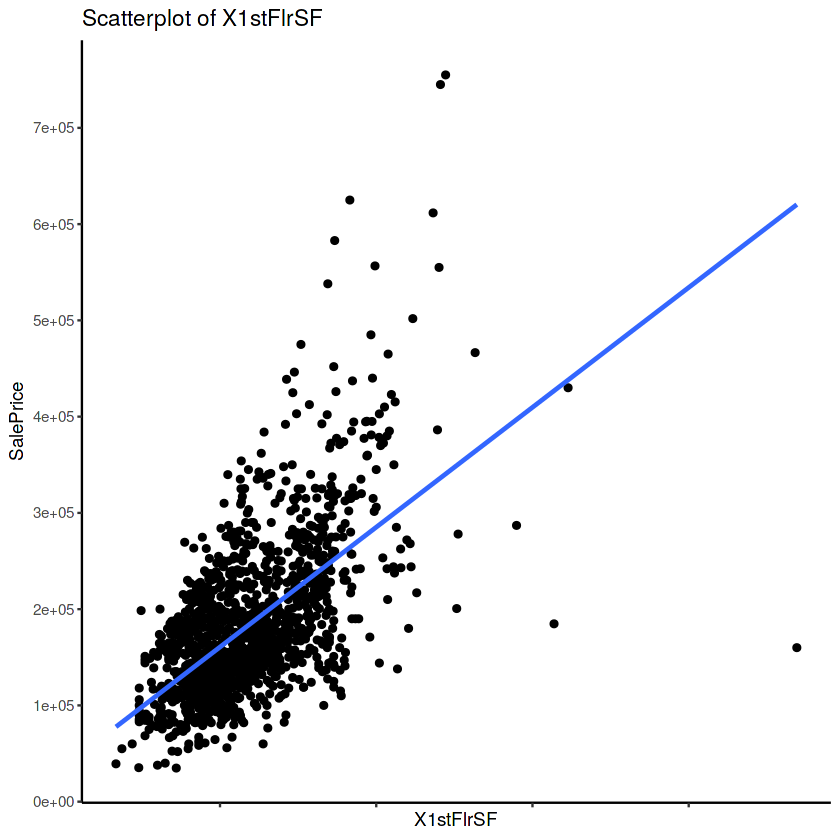

In [20]:
train %>% 
  ggplot(aes(x=X1stFlrSF, y=SalePrice)) +
  geom_point( fill="blue") +
  geom_smooth(method="lm", se=FALSE) +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  theme_classic() +
  theme(axis.text.x = element_blank()) +
  labs(title="Scatterplot of X1stFlrSF")

There is a positive correlation clearly. There is one extreme variable. House number **1299**. This house has appeared before.

In [21]:
Outlier5<-train %>% 
  select(Id, X1stFlrSF, SalePrice) %>% 
  arrange(desc(X1stFlrSF)) 
  head(Outlier5, 1)

,Id,X1stFlrSF,SalePrice
,<int>,<int>,<int>
1,1299,4692,160000


**Full Bath**

These are the full bathrooms above grade. Let us plot its values.

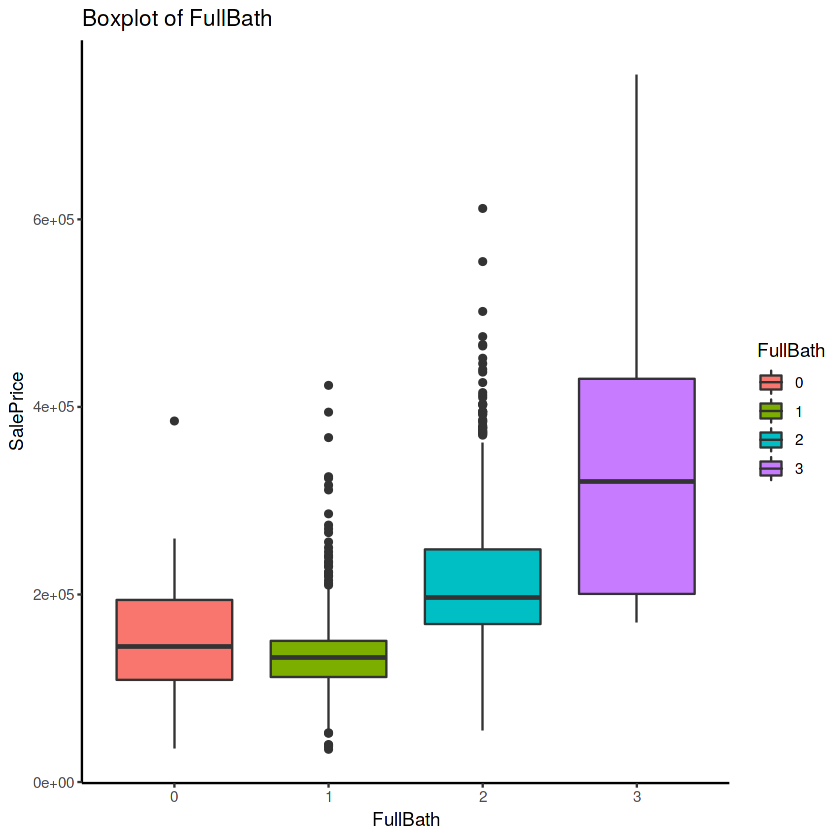

In [22]:
train %>% 
  mutate(FullBath = as.factor(FullBath)) %>% 
  ggplot(aes(FullBath, y=SalePrice, fill= FullBath)) +
  geom_boxplot() +
  theme_classic() +
  labs(title="Boxplot of FullBath")

There  is definitely a positive correlation and there are no extreme outliers here. The more the number of fullbathrooms , the higher the price.

**TotRmsAbvGrd**

Total rooms above grade. This does not include bathrooms.

Warning message:
“`show.legend` must be a logical vector.”


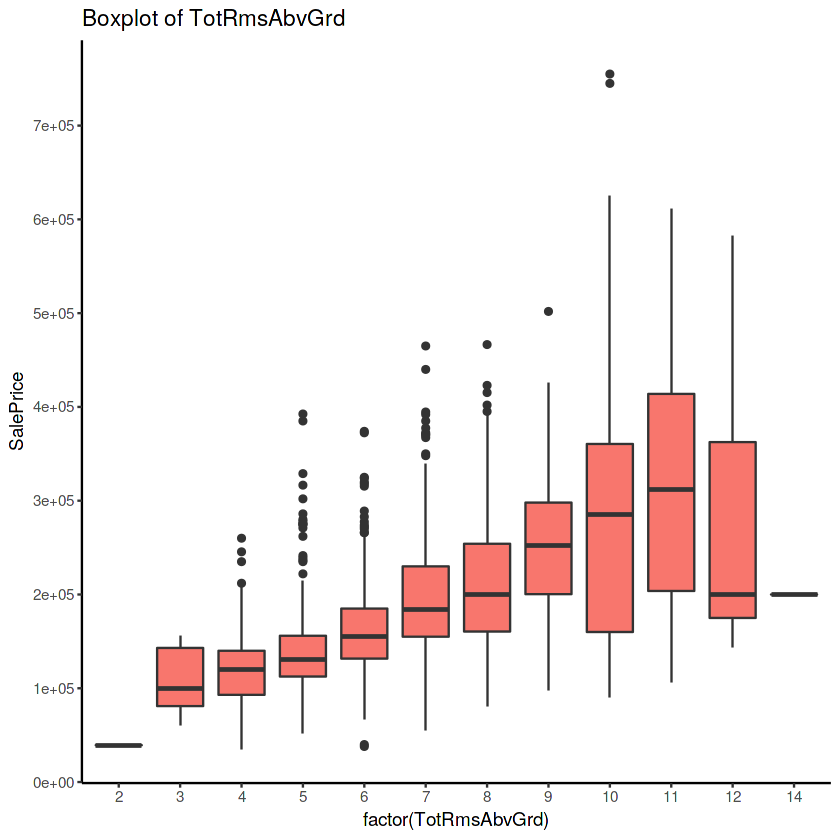

In [23]:
train %>% 
  ggplot(aes(x=factor(TotRmsAbvGrd), y=SalePrice, fill="TorTmsAbvGrd")) +
  geom_boxplot(show.legend = "FALSE") +
  theme_classic() +
  scale_y_continuous(breaks=seq(0, 800000, by=100000)) +
  labs(title="Boxplot of TotRmsAbvGrd")

There is a positive trend from total rooms of 2 - 11 but total rooms of 12 and 14 drop in price. In terms of outliers , there are no extreme values except for the two houses with a total of 10 rooms but i dont see it as much of an issue.

**Year Sold**

This is the year when the houses were built.

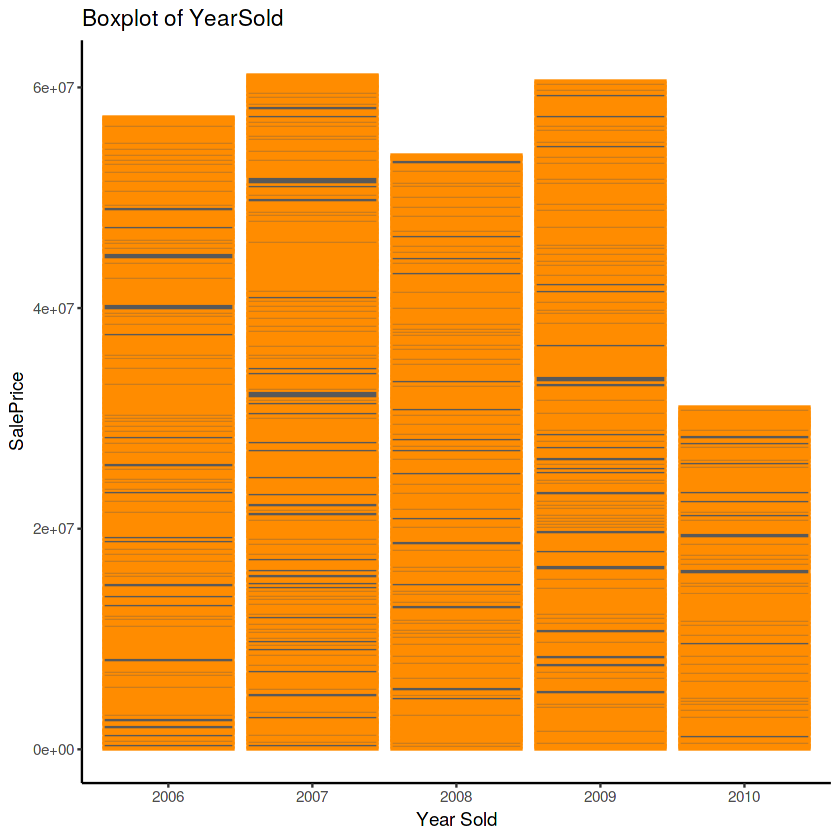

In [24]:
train %>% 
  ggplot(aes(x=factor(YrSold), y=SalePrice )) +
  geom_col(color = "darkorange", show.legend = F) +
  theme_classic() +
  labs(x="Year Sold",
       title="Boxplot of YearSold")

Seasonality seems to be playing a big role in sale prices.


**Month sold**

This is the month when houses have been sold.

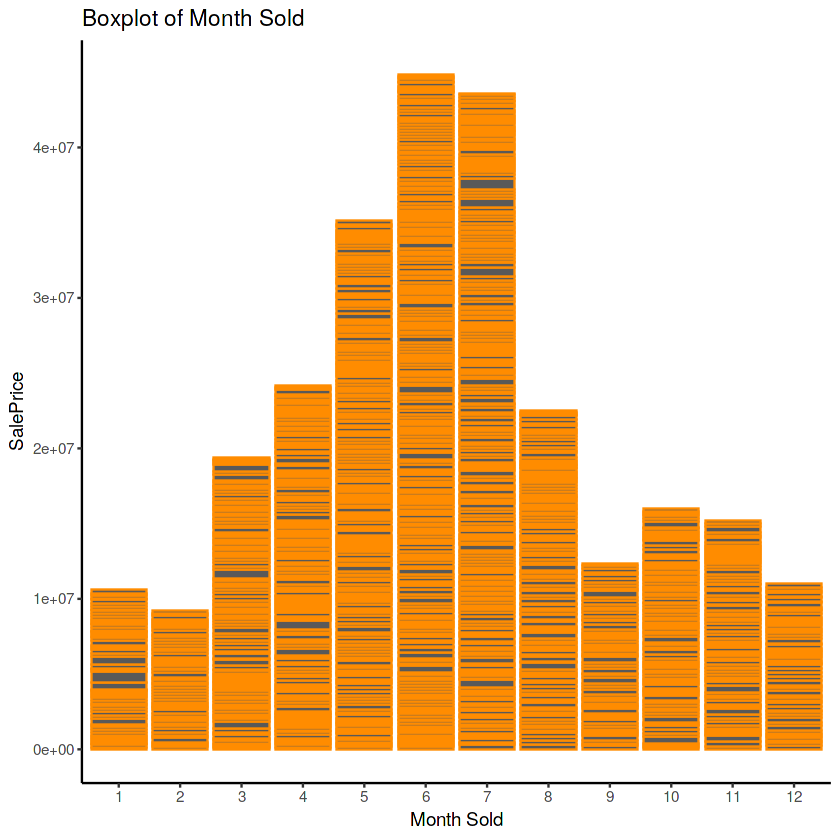

In [25]:
train %>% 
  ggplot(aes(x=factor(MoSold), y=SalePrice)) +
  geom_col(color = "darkorange", show.legend = F) +
  theme_classic() +
  labs(x="Month Sold",
       title="Boxplot of Month Sold")

Most sales occured in June and the least were in February. There is no trend.

**MSZoning**

Lets now look a the external elements that affect the price of a house. MSZoning indicates the housing environment in our dataset.

Lets look at its classification.

A  Agriculture

C Commercial

FV Floating Village Residential

I Industrial

RH Residential High Density

RL Residential Low Density

RP Residential Low Density Parking

RM Residential Meduim Density

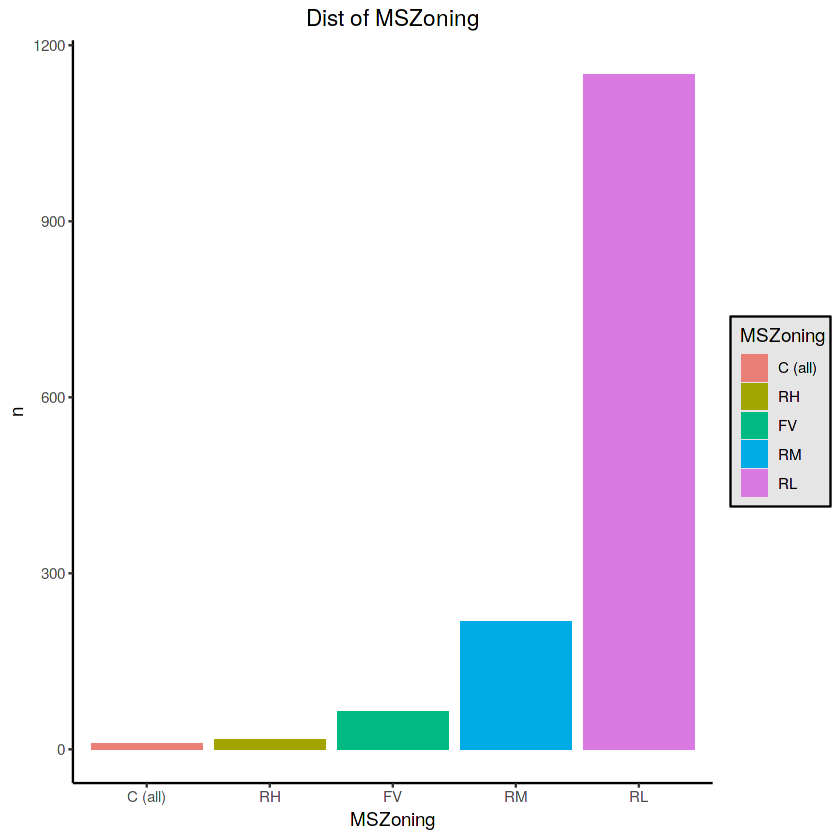

In [26]:
train %>% 
  count(MSZoning, sort = T)   %>% 
  mutate(MSZoning = fct_reorder(MSZoning, n)) %>% 
  ggplot(aes(x=MSZoning,y=n, fill= MSZoning)) +
  geom_col() +
  scale_fill_hue(c=80) +
  labs(title="Dist of MSZoning") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "right",legend.background = element_rect(fill="grey90", size=0.5, linetype = "solid", colour = "black")) 

Most houses are built in the area of Residentail Low Density(1151), and followed by Medium Density(218). Commercial Floating has the least houses.

Lets look at a boxplot.

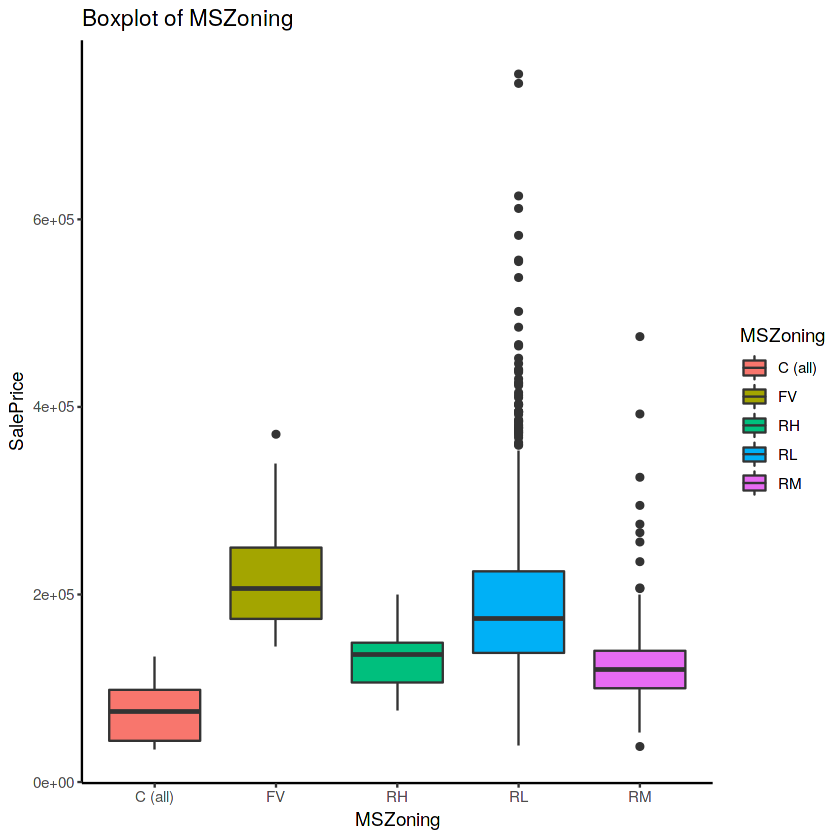

In [27]:
train %>% 
  ggplot(aes(x=MSZoning, y=SalePrice, fill=MSZoning)) +
  geom_boxplot() +
  theme_classic() +
  labs(title="Boxplot of MSZoning")

Floating village has the highest average sale price then Residential Low Density .The least average price is commercial.

Let us look at why commercial has the lowest average sale price.

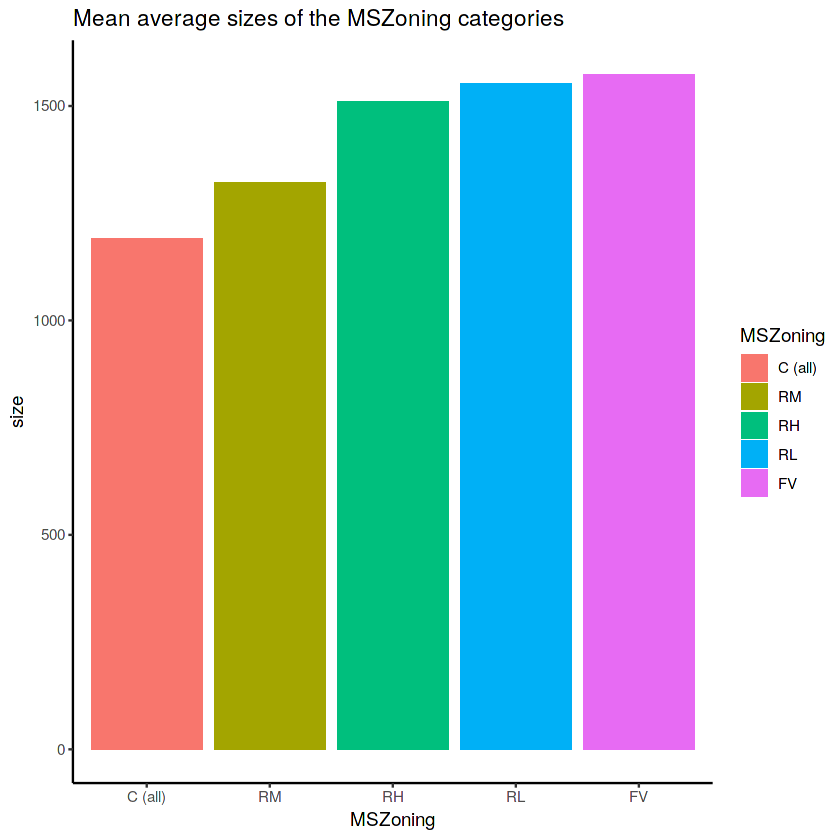

In [28]:
ddply(train, .(MSZoning), summarize, size=mean(GrLivArea)) %>% 
  mutate(MSZoning = fct_reorder(MSZoning , size)) %>% 
  ggplot(aes(x=MSZoning, y=size, fill=MSZoning)) +
  geom_col() +
  theme_classic() +
  labs(title="Mean average sizes of the MSZoning categories")

Commercial has the least average size so it makes sense why its the cheapest compared to the rest.

## OUTLIERS 

Let us now seperate  the data back into train and test.

In [29]:
train<-all[c(1:1460),]
test<-all[c(1461:nrow(all)),]

Let us now remove the outliers to better our model

In [30]:
train_clean<-train[-c(458,524,1299,692,1183,485),]

sales_df <- train_clean %>% 
  mutate_if(is.character, factor) 

## FEATURE ENGINEERING

We will do a variable selection to prevent overfitting or underfitting the models.

In [31]:
#select the numerical features first and create a model
numerical_features <- sales_df %>% 
  select(SalePrice, where(is.numeric)) %>% 
  lm(SalePrice~., data = .) %>% 
  tidy() %>% 
  filter(p.value <= 0.05) %>% 
  select(term)

#select the categorical features
categorical_features <- sales_df %>% 
  select(SalePrice, where(is.factor)) %>% 
  rename_if(is.factor, .funs =  ~paste(., "/", sep = "")) %>% 
  lm(SalePrice~., data = .) %>% 
  tidy() %>% 
  filter(p.value <= 0.05) %>% 
  select(term) %>% 
  mutate(new_term = str_replace_all(term, "\\/.*", "")) %>% 
  mutate(new_term = str_replace(new_term, "'", "")) %>% 
  select(new_term)

#create data for modelling
main_effects_data <- sales_df %>% 
  select(SalePrice, MSZoning, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, ExterQual, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, CentralAir, KitchenQual, Functional, Fireplaces, GarageFinish, GarageQual, GarageCond, SaleType, SaleCondition, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2) %>% 
  mutate_if(is.character, factor)

## MODEL BUILDING

## 1. Lasso Regression


**Step 1:splitting the data into training and test data**

In [32]:
set.seed(123)

data_split <- initial_split(main_effects_data, prop = 0.7 )
data_train <- training(data_split)
data_test <- testing(data_split)

#resampling folds
v_folds <- vfold_cv(data_train)

**Step 2:create a recipe**

The recipe normalizes, centres, removes multicorreliniaty for us.
It also deals with categorical imbalances.

In [33]:

main_effects_recipe <- recipe(SalePrice~., data = data_train) %>% 
  step_corr(all_numeric(), -all_outcomes()) %>% 
  step_nzv(all_numeric(), -all_outcomes()) %>% 
  step_normalize(all_numeric(), -all_outcomes()) %>% 
  step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
  step_pca(all_numeric(), -all_outcomes()) %>% 
  step_other(all_nominal()) %>% 
  step_dummy(all_nominal()) 

**Step 3:Define the linear regression model**

In [34]:
#lasso regression model
linear_model <- linear_reg(penalty = tune(), mixture = 1) %>% 
  set_mode("regression") %>% 
  set_engine("glmnet")

#Define model parameters
lasso_info <- parameters(linear_model)

#Create the workflow
main_wf <- workflow() %>% 
  add_recipe(main_effects_recipe) %>% 
  add_model(linear_model)

**Step 4:Set the model metrics**

In [35]:
model_metrics <- metric_set(rmse, rsq, rsq_trad, mae)

**Step 5: Create tuning grid for model and pre-processing methods**

In [36]:
lasso_grid <- grid_regular(lasso_info, levels = 15)

**Step 6: Tune the  model**

In [37]:
doParallel::registerDoParallel()

set.seed(789)

linear_res <- tune_grid(main_wf,
                     resamples = v_folds,
                     grid = lasso_grid,
                     metrics = model_metrics)


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice



Attaching package: ‘vctrs’


The following object is masked from ‘package:dplyr’:

    data_frame


The following object is masked from ‘package:tibble’:

    data_frame


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.0-2



In [38]:
linear_res %>% 
  collect_metrics() %>% 
  group_by(.metric) %>% 
  summarise(min = min(mean),
            median = median(mean),
            mean = mean(mean),
            max = max(mean))

`summarise()` ungrouping output (override with `.groups` argument)



.metric,min,median,mean,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mae,2.370383e+04,2.370383e+04,2.370383e+04,2.370383e+04
rmse,3.397435e+04,3.397435e+04,3.397435e+04,3.397435e+04
rsq,8.039297e-01,8.039297e-01,8.039297e-01,8.039297e-01
rsq_trad,7.977148e-01,7.977148e-01,7.977148e-01,7.977148e-01


select parameters with the best metric.

In [39]:
linear_tune <- linear_res %>% select_best("mae")

In [40]:
#Appluing the parameters to the model
linear_model <- finalize_model(linear_model, linear_tune)

lasso_workflow <- workflow() %>% 
  add_model(linear_model) %>% 
  add_recipe(main_effects_recipe)

View our variable importance.


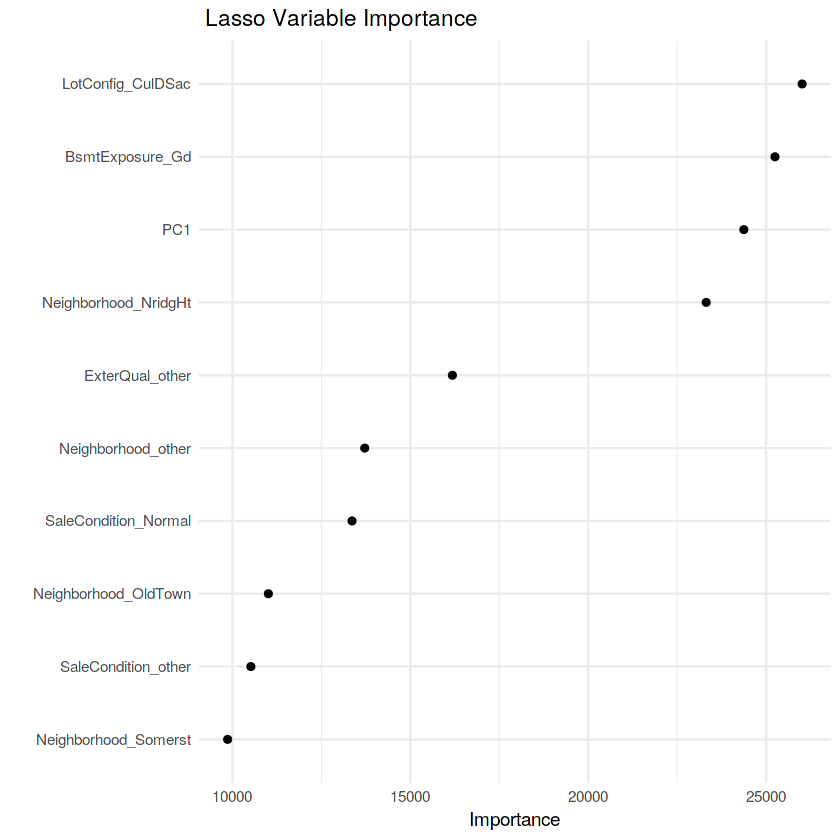

In [41]:
lasso_workflow %>% 
  fit(data = data_train) %>% 
  pull_workflow_fit() %>% 
  vip(geom = "point") +
  theme_minimal() +
  ggtitle(" Lasso Variable Importance")

## 2.Random Forest

Defining the model.

In [42]:
#Random forest model
rf_spec <- rand_forest(
  trees = 1000) %>% 
  set_mode("regression") %>% 
  set_engine("ranger")

In [43]:
rf_wf <- workflow() %>% 
  add_recipe(main_effects_recipe) %>% 
  add_model(rf_spec)

Tuning the model.

In [44]:
set.seed(56)

rf_res <- tune_grid(
  rf_wf,
  resamples = v_folds,
  grid = 20,
  metrics = model_metrics
)

Warning message:
“No tuning parameters have been detected, performance will be evaluated using the resamples with no tuning. Did you want to [tune()] parameters?”


In [45]:
rf_res %>% 
  collect_metrics() %>% 
  group_by(.metric) %>% 
  summarise(min = min(mean),
            median = median(mean),
            mean = mean(mean),
            max = max(mean))

`summarise()` ungrouping output (override with `.groups` argument)



.metric,min,median,mean,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mae,2.297901e+04,2.297901e+04,2.297901e+04,2.297901e+04
rmse,3.518309e+04,3.518309e+04,3.518309e+04,3.518309e+04
rsq,7.975327e-01,7.975327e-01,7.975327e-01,7.975327e-01
rsq_trad,7.839418e-01,7.839418e-01,7.839418e-01,7.839418e-01


select parameters with the best metric.

In [46]:
rf_tune <- rf_res %>% select_best("mae")

Apply parameters to the model.

In [47]:
rf_spec <- finalize_model(rf_spec, rf_tune)

rf_workflow <- workflow() %>% 
  add_model(rf_spec) %>% 
  add_recipe(main_effects_recipe)

## 3. Xgboost Model

Define the model.

In [48]:
xg_spec <-boost_tree(
  trees = 1000,
  tree_depth = tune(), min_n = tune(), loss_reduction = tune(),
  sample_size = tune(), mtry = tune(), learn_rate = tune()
) %>% 
  set_engine("xgboost") %>% 
  set_mode("regression")

Tuning our grid.

In [49]:
xg_grid <- grid_latin_hypercube(
  tree_depth(),
  min_n(),
  loss_reduction(),
  sample_size = sample_prop(),
  finalize(mtry(),data_train),
  learn_rate(),
  size = 20
)

xg_grid

tree_depth,min_n,loss_reduction,sample_size,mtry,learn_rate
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
6,25,3.039006e-04,0.9120992,19,7.835922e-08
5,37,4.382760e-03,0.6388630,3,3.106913e-04
2,6,3.428881e-08,0.8121432,5,5.444042e-09
5,29,7.881800e+00,0.6405611,13,4.874825e-06
7,15,9.410386e-05,0.5832415,21,1.512401e-04
11,32,9.174380e-04,0.7618777,7,2.270372e-05
10,27,4.897961e-05,0.3241348,29,1.729214e-09
12,35,2.520789e-10,0.8427506,13,5.588602e-07
15,33,1.010593e-06,0.6886148,9,1.096704e-10


In [50]:
set.seed(389)

xg_res <- tune_grid(xg_spec,
                        main_effects_recipe,
                        resamples = v_folds,
                        grid = xg_grid,
                        metrics = model_metrics)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




Viewing the metrics

In [51]:
xg_res %>% 
  collect_metrics() %>% 
  group_by(.metric) %>% 
  summarise(min = min(mean),
            median = median(mean),
            mean = mean(mean),
            max = max(mean))

`summarise()` ungrouping output (override with `.groups` argument)



.metric,min,median,mean,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mae,21734.5002567,178704.790674,140446.061910,140446.061910
rmse,32684.6343835,194216.680351,155949.902002,155949.902002
rsq,0.5045329,0.680721,0.682402,0.682402
rsq_trad,-5.7630706,-5.714535,-3.994294,-3.994294


Selecting the best parameters for the model.

In [52]:
xg_tune <- xg_res %>% select_best("mae")

#Applying the parameters to the model.
xg_spec <- finalize_model(xg_spec, xg_tune)

xg_workflow <- workflow() %>% 
  add_model(xg_spec) %>% 
  add_recipe(main_effects_recipe)

Our variable importance for the model.

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


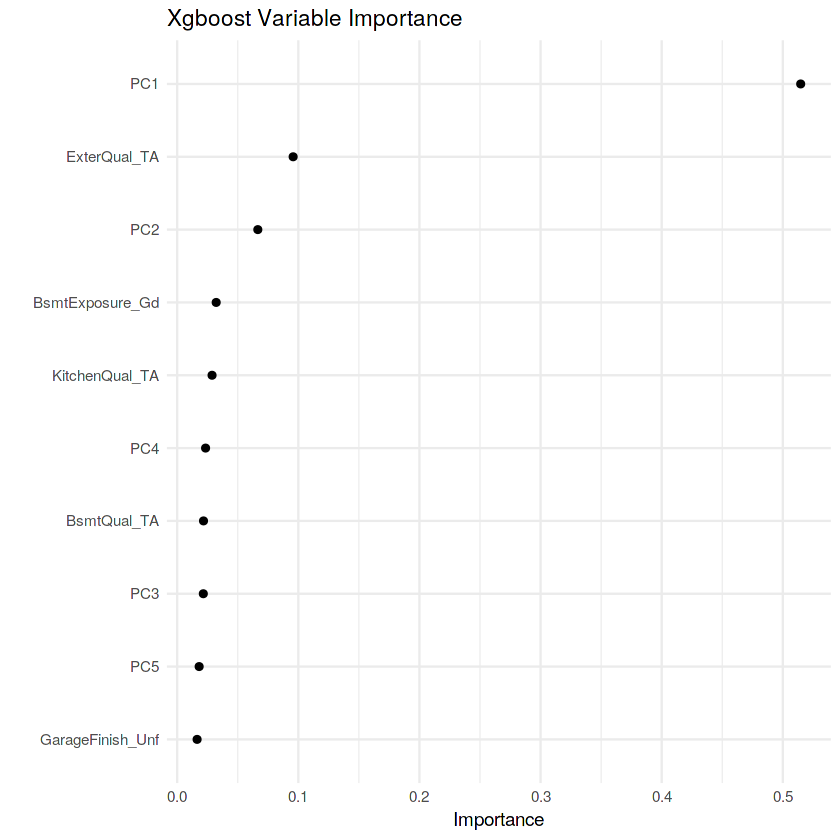

In [53]:
xg_workflow %>% 
  fit(data = data_train) %>% 
  pull_workflow_fit() %>% 
  vip(geom = "point") +
  theme_minimal() +
  ggtitle("Xgboost Variable Importance")

## 4. Decision Trees

Define the model

In [54]:
tree_spec <- decision_tree(
  cost_complexity = tune(),
  tree_depth = tune(),
  min_n = tune()
) %>% 
  set_engine("rpart") %>% 
  set_mode("regression")

tree_spec

tree_grid <- grid_regular(cost_complexity(), tree_depth(), min_n(), levels = 4)

Decision Tree Model Specification (regression)

Main Arguments:
  cost_complexity = tune()
  tree_depth = tune()
  min_n = tune()

Computational engine: rpart 


In [55]:
set.seed(2020)
tree_res <- tune_grid(
  tree_spec,
  SalePrice~.,
  resamples = v_folds,
  grid = tree_grid,
  metrics = metric_set(rmse, rsq, mae, mape)
)


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




Exploring the results.

`summarise()` ungrouping output (override with `.groups` argument)



.metric,min,median,mean,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mae,2.717232e+04,2.991272e+04,3.289327e+04,3.289327e+04
mape,1.601837e+01,1.726969e+01,2.009983e+01,2.009983e+01
rmse,3.961386e+04,4.485285e+04,4.649220e+04,4.649220e+04
rsq,4.449531e-01,6.818094e-01,6.276198e-01,6.276198e-01


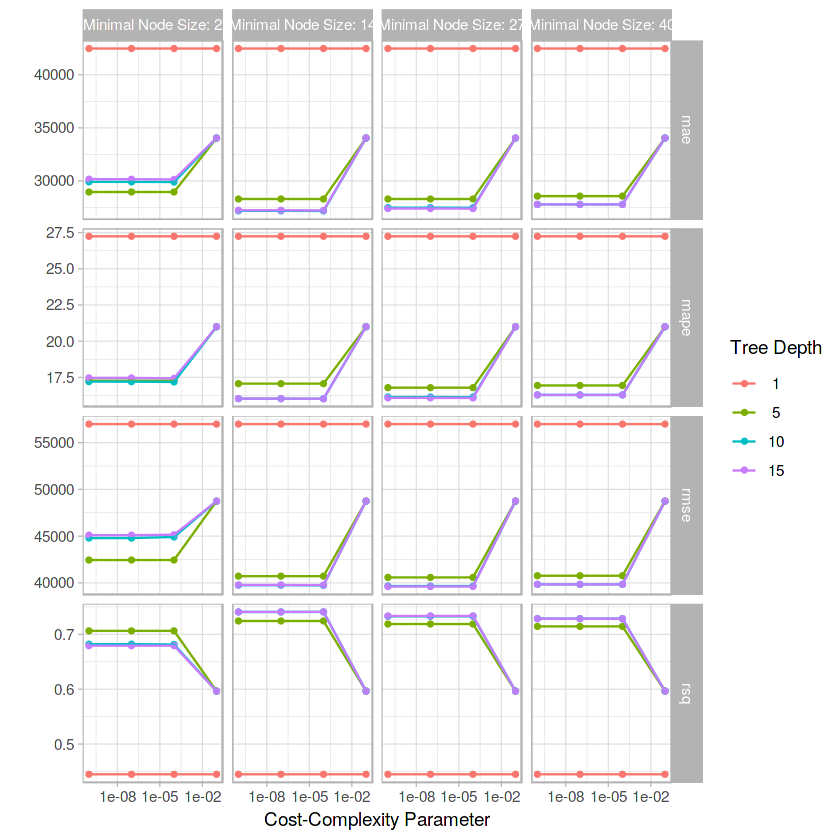

In [56]:
tree_res %>% 
  collect_metrics() %>% 
  group_by(.metric) %>% 
  summarise(min = min(mean),
            median = median(mean),
            mean = mean(mean),
            max = max(mean))

autoplot(tree_res) + theme_light()

Select best parameters.

In [57]:
show_best(tree_res)
select_best(tree_res, "rmse")

tree_tune <-tree_res %>% select_best("mae")

#Apply parameters to the model
tree_spec <- finalize_model(tree_spec, tree_tune)

tree_workflow <- workflow() %>% 
  add_model(tree_spec) %>% 
  add_recipe(main_effects_recipe)

Warning message:
“No value of `metric` was given; metric 'rmse' will be used.”


cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>
1e-04,15,27,rmse,standard,39613.86,10,1504.976,Preprocessor1_Model47
1e-10,15,27,rmse,standard,39616.12,10,1504.370,Preprocessor1_Model45
1e-07,15,27,rmse,standard,39616.12,10,1504.370,Preprocessor1_Model46
1e-04,10,27,rmse,standard,39663.45,10,1513.059,Preprocessor1_Model43
1e-10,10,27,rmse,standard,39665.71,10,1512.448,Preprocessor1_Model41


cost_complexity,tree_depth,min_n,.config
<dbl>,<int>,<int>,<fct>
1e-04,15,27,Preprocessor1_Model47


Viewing our variable importance

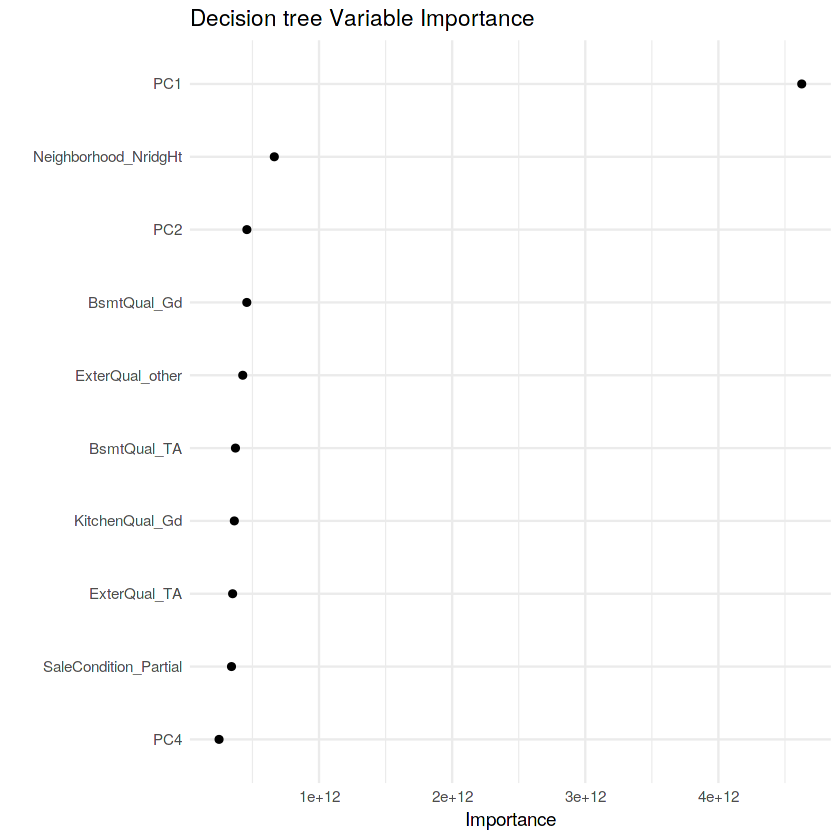

In [58]:
tree_workflow %>% 
  fit(data = data_train) %>% 
  pull_workflow_fit() %>% 
  vip(geom = "point") +
  theme_minimal() +
  ggtitle("Decision tree Variable Importance")

## Analysing the models

The lasso regression model gave importance to the Lot Configaration while Xgboost and Decision trees gave importance to PC1 which is 3rd on the lasso regression model.

The best performing model was the Lasso regression model with the following metrics:

1. Mean Absolute Error(MAE) - 23704.

2. Root Mean Squared Error(RMSE) - 33874.

3. R-squared - 0.804

4. R-squared trad - 0.798


Now let us fit the lasso regression model onto our dataset.

In [59]:
pricing_model_fit <- last_fit(lasso_workflow, data_split) 

pricing_model_fit %>% 
  collect_predictions() %>% 
  mae(.pred, SalePrice)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mae,standard,23714.46


View our model predictions.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



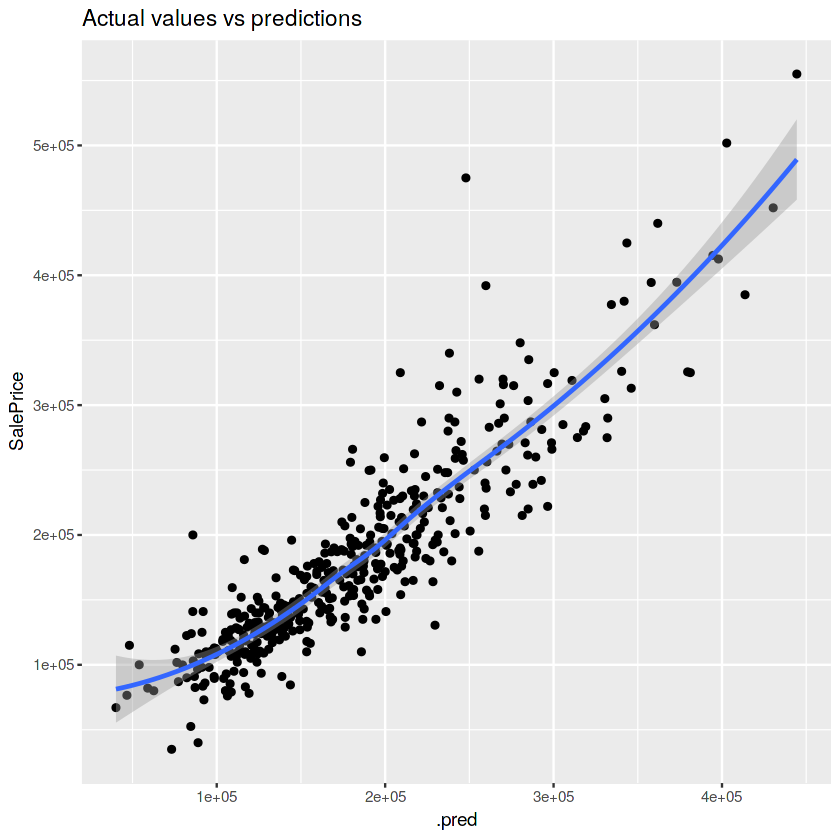

In [60]:
pricing_model_fit %>% 
  collect_predictions() %>% 
  ggplot(aes(.pred, SalePrice)) +
  geom_point() +
  geom_smooth() +
  ggtitle("Actual values vs predictions")